In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from google.colab import files
uploaded = files.upload()


Saving with_zip_code.csv to with_zip_code.csv


In [5]:
df1 = pd.read_csv("hygiene_data.csv")

In [6]:
df3 = pd.read_csv('with_zip_code.csv')

In [7]:
df3['name_lower'] = df3['name'].str.lower()
df3['zip_code'] = df3['zip_code'].astype('int')
df3.head()

,Unnamed: 0,id,name,review_count,rating,price,location,zip_code,url,name_lower
0,0,s9pxTIWRwCHzMAOHbcmuFw,Chicken Shack,109,3.0,$$,"{'address1': '36-19 Broadway', 'address2': '',...",11106,https://www.yelp.com/biz/chicken-shack-astoria...,chicken shack
1,1,e08qVeVYBR-0QI_G0NDZpw,Sugar Monk,152,4.5,$$,"{'address1': '2292 Frederick Douglass Blvd', '...",10027,https://www.yelp.com/biz/sugar-monk-new-york?a...,sugar monk
2,2,a-hVnSTC12MY5L3t9yOSJw,Eastern Chinese Restaurant,31,3.0,$,"{'address1': '2105 Broadway', 'address2': '', ...",11106,https://www.yelp.com/biz/eastern-chinese-resta...,eastern chinese restaurant
3,3,JWQlPP4Oxrtwb0rNjnVgIg,Hunts Point Chinese Restaurant,8,4.0,NaN,"{'address1': '901 Southern Blvd', 'address2': ...",10459,https://www.yelp.com/biz/hunts-point-chinese-r...,hunts point chinese restaurant
4,4,nXh79laNQ7leN92F5Ore-Q,Forever Taste,52,4.0,$,"{'address1': '27 Rutgers St', 'address2': '', ...",10002,https://www.yelp.com/biz/forever-taste-new-yor...,forever taste


In [8]:
df1['name_lower'] = df1['DBA'].str.lower()
df1.dropna(subset=['ZIPCODE'], inplace=True)
df1['ZIPCODE'] = df1['ZIPCODE'].astype('int')

In [9]:
new_df = pd.merge(df1, df3,  how='inner', left_on=['name_lower','ZIPCODE'], right_on = ['name_lower','zip_code'])
new_df = new_df.drop(columns = [ 'DBA', 'name_lower','Unnamed: 0', 'zip_code'])
new_df.drop(new_df[new_df['GRADE'] == 'N'].index, inplace = True)
new_df.dropna(subset=['price'], inplace=True)
new_df['GRADE'] = new_df['GRADE'].replace(['Z'], 'P')

In [34]:
new_df_dropped.shape

(1605, 16)

In [27]:

sorted_df = new_df.sort_values(by='GRADE DATE', ascending=False)
new_df_dropped = sorted_df.drop_duplicates(subset='url', keep='first')

Text(0.5, 1.0, 'Distribution of Hygiene Grade')

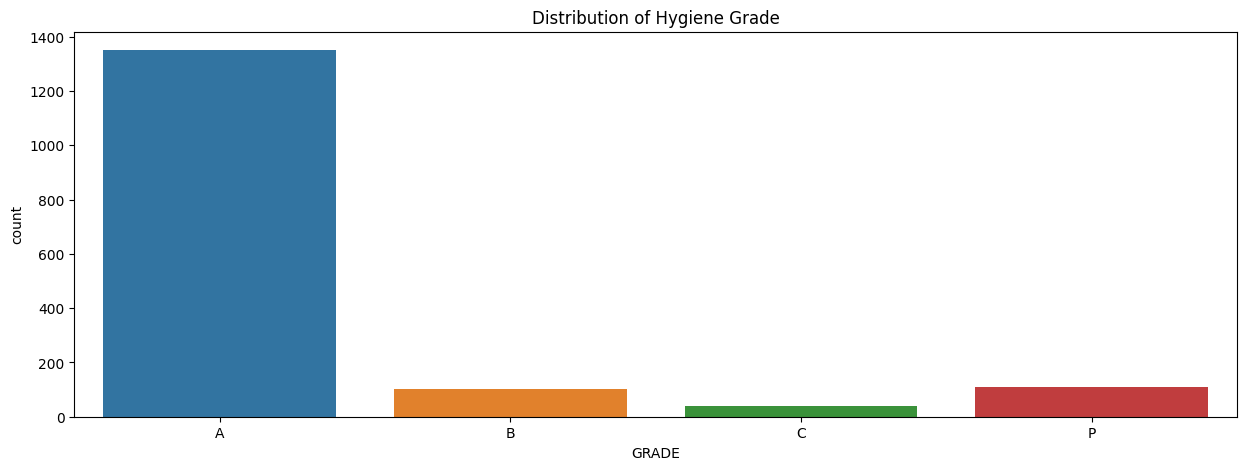

In [31]:
fig, ax = plt.subplots(figsize = (15, 5))
sns.countplot(x = 'GRADE', data = new_df_dropped, order = ['A', 'B', 'C', 'P']) 
ax.set_title('Distribution of Hygiene Grade')

Text(0.5, 1.0, 'Distribution of Borough')

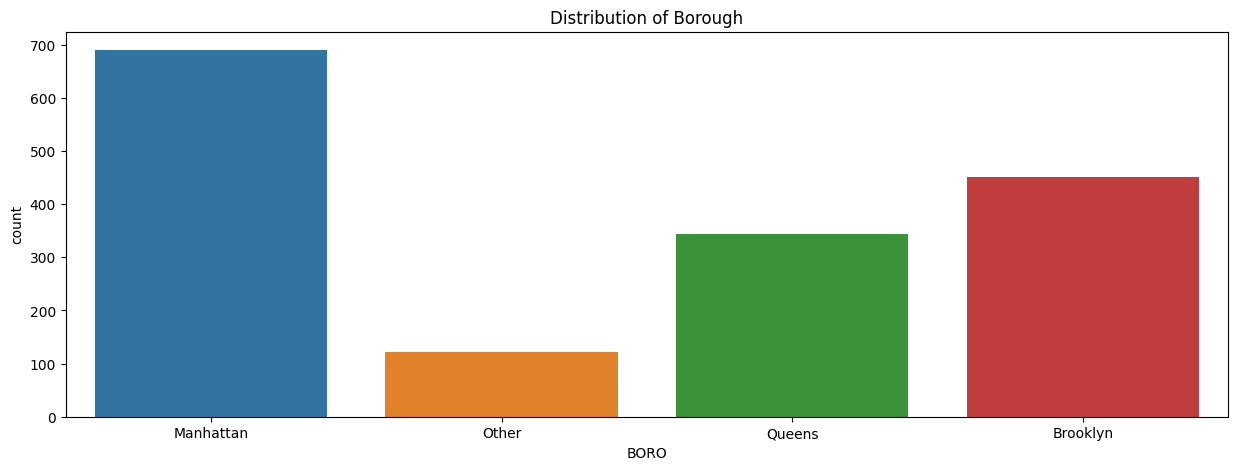

In [32]:
new_df_dropped['BORO'] = new_df_dropped['BORO'].replace('Bronx','Other')
new_df_dropped['BORO'] = new_df_dropped['BORO'].replace('Staten Island','Other')

fig, ax = plt.subplots(figsize = (15, 5))
sns.countplot(x = 'BORO', data = new_df_dropped) 
ax.set_title('Distribution of Borough')

In [19]:
import warnings
warnings.filterwarnings('ignore')

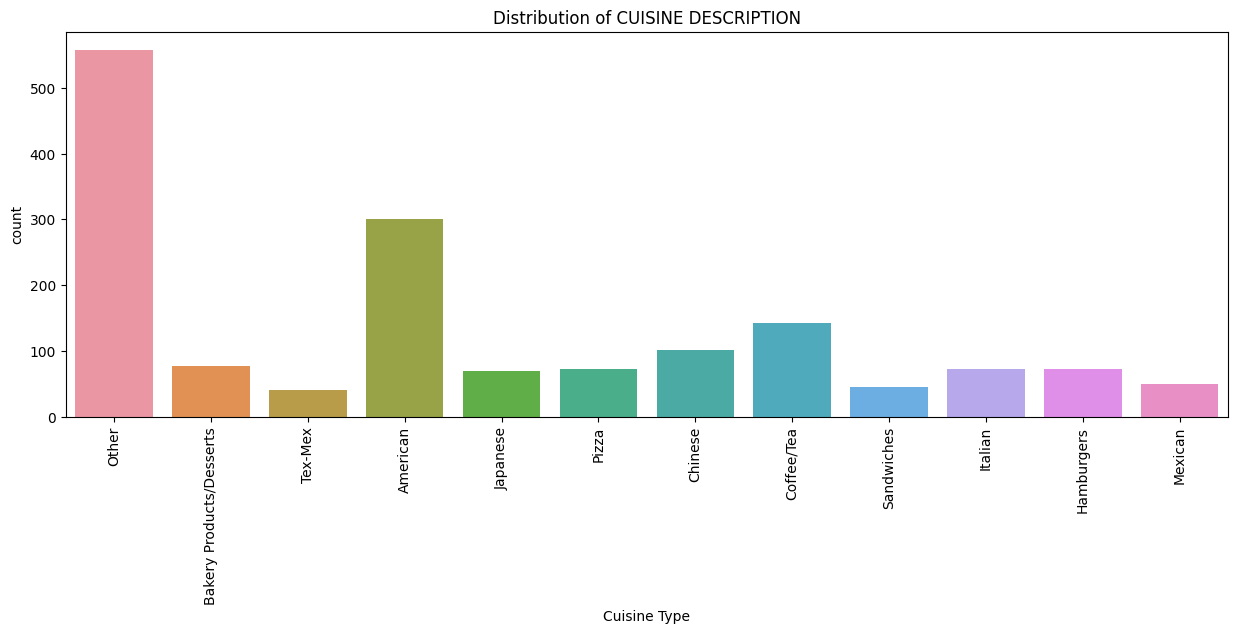

In [33]:
s = new_df_dropped['CUISINE DESCRIPTION'].value_counts()
new_df_dropped['CUISINE DESCRIPTION'] = np.where(new_df_dropped['CUISINE DESCRIPTION'].isin(s.index[s < 40]), 'Other', new_df_dropped['CUISINE DESCRIPTION'])
fig, ax = plt.subplots(figsize = (15, 5))
sns.countplot(x = 'CUISINE DESCRIPTION', data = new_df_dropped) 
ax.set_title('Distribution of CUISINE DESCRIPTION')
ax.set(xlabel='Cuisine Type')
ax.tick_params(axis = 'x', rotation = 90)

In [30]:
from google.colab import files
new_df_dropped.to_csv('concat_restaurant_hygiene.csv') 
files.download('concat_restaurant_hygiene.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>